In [359]:
import pickle
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from shapely.geometry import Point
%matplotlib inline
import geopandas as gpd
import numpy as np
from sklearn.metrics import r2_score

In [381]:
smaller_df = pd.read_pickle('smallerpickledata')

In [382]:
smaller_df.shape

(3124, 13)

In [383]:
smaller_df.head()

,Address,Bath,Beds,Features,Kitchen,LivingSpace,Outdoor,Parking,Pets,Rent,Sqft,Zip,uFeatures
0,1222 Harrison StSan FranciscoCA94103,1.0,0,"High Speed Internet Access,Wi-Fi,Washer/Dryer,...",Green Rooftops,"Hardwood Floors,Carpet,Vinyl Flooring,Dining R...","Rooftop Lounge,Courtyard,Grill,Picnic Area",0,"No Pets Allowed,,Dogs Allowed:,Fairfield welco...",3495,445,94103,"Bike Storage,Central Courtyard with Ping Pong,..."
1,1222 Harrison StSan FranciscoCA94103,1.0,0,"High Speed Internet Access,Wi-Fi,Washer/Dryer,...",Green Rooftops,"Hardwood Floors,Carpet,Vinyl Flooring,Dining R...","Rooftop Lounge,Courtyard,Grill,Picnic Area",0,"No Pets Allowed,,Dogs Allowed:,Fairfield welco...",3495,445,94103,"Bike Storage,Central Courtyard with Ping Pong,..."
2,1222 Harrison StSan FranciscoCA94103,1.0,1,"High Speed Internet Access,Wi-Fi,Washer/Dryer,...",Green Rooftops,"Hardwood Floors,Carpet,Vinyl Flooring,Dining R...","Rooftop Lounge,Courtyard,Grill,Picnic Area",0,"No Pets Allowed,,Dogs Allowed:,Fairfield welco...",4136,680,94103,"Bike Storage,Central Courtyard with Ping Pong,..."
3,1222 Harrison StSan FranciscoCA94103,2.0,2,"High Speed Internet Access,Wi-Fi,Washer/Dryer,...",Green Rooftops,"Hardwood Floors,Carpet,Vinyl Flooring,Dining R...","Rooftop Lounge,Courtyard,Grill,Picnic Area",0,"No Pets Allowed,,Dogs Allowed:,Fairfield welco...",5342,982,94103,"Bike Storage,Central Courtyard with Ping Pong,..."
4,340 Fremont StSan FranciscoCA94105,1.0,0,"Washer/Dryer,Air Conditioning,Storage Units",Island Kitchen with Stainless Steel Appliances,Walk-In Closets,Sundeck,"Parking,Covered,Parking Available","Dogs and Cats Allowed:,0,$500 Deposit,$75 Mont...",3140,498,94105,Smoke Free Living


In [503]:
dummy.head()

,Address,Bath,Beds,Features,Kitchen,LivingSpace,Outdoor,Parking,Pets,Rent,...,neighborhood_Telegraph Hill,neighborhood_Tenderloin,neighborhood_Tiburon,neighborhood_Union Street,neighborhood_Upper Market,neighborhood_Visitacion Valley,neighborhood_West Portal,neighborhood_Western Addition,neighborhood_Westwood Park,neighborhood_Woodside
0,1222 Harrison StSan FranciscoCA94103,1.0,0,"High Speed Internet Access,Wi-Fi,Washer/Dryer,...",Green Rooftops,"Hardwood Floors,Carpet,Vinyl Flooring,Dining R...","Rooftop Lounge,Courtyard,Grill,Picnic Area",0,"No Pets Allowed,,Dogs Allowed:,Fairfield welco...",3495,...,0,0,0,0,0,0,0,0,0,0
1,1222 Harrison StSan FranciscoCA94103,1.0,0,"High Speed Internet Access,Wi-Fi,Washer/Dryer,...",Green Rooftops,"Hardwood Floors,Carpet,Vinyl Flooring,Dining R...","Rooftop Lounge,Courtyard,Grill,Picnic Area",0,"No Pets Allowed,,Dogs Allowed:,Fairfield welco...",3495,...,0,0,0,0,0,0,0,0,0,0
2,1222 Harrison StSan FranciscoCA94103,1.0,1,"High Speed Internet Access,Wi-Fi,Washer/Dryer,...",Green Rooftops,"Hardwood Floors,Carpet,Vinyl Flooring,Dining R...","Rooftop Lounge,Courtyard,Grill,Picnic Area",0,"No Pets Allowed,,Dogs Allowed:,Fairfield welco...",4136,...,0,0,0,0,0,0,0,0,0,0
3,1222 Harrison StSan FranciscoCA94103,2.0,2,"High Speed Internet Access,Wi-Fi,Washer/Dryer,...",Green Rooftops,"Hardwood Floors,Carpet,Vinyl Flooring,Dining R...","Rooftop Lounge,Courtyard,Grill,Picnic Area",0,"No Pets Allowed,,Dogs Allowed:,Fairfield welco...",5342,...,0,0,0,0,0,0,0,0,0,0
4,340 Fremont StSan FranciscoCA94105,1.0,0,"Washer/Dryer,Air Conditioning,Storage Units",Island Kitchen with Stainless Steel Appliances,Walk-In Closets,Sundeck,"Parking,Covered,Parking Available","Dogs and Cats Allowed:,0,$500 Deposit,$75 Mont...",3140,...,0,0,0,0,0,0,0,0,0,0


In [496]:
pets = []

for p in dummy.Pets:
    if isinstance(p, str):
        if 'Dogs and Cats Allowed' in p:
            pets.append(1)
        elif "Cats and Dogs Allowed" in p:
            pets.append(1)
        elif "Cats Allowed" in p:
            pets.append(1)
        elif "Dogs Allowed" in p:
            pets.append(1)
        elif "Pets Negotiable" in p:
            pets.append(1)
        else:
            pets.append(0)
    else:
        pets.append(0)
len(pets)

2757

In [504]:
dummy['Pets Allowed'] = pets

In [505]:
dummy.head()

,Address,Bath,Beds,Features,Kitchen,LivingSpace,Outdoor,Parking,Pets,Rent,...,neighborhood_Tenderloin,neighborhood_Tiburon,neighborhood_Union Street,neighborhood_Upper Market,neighborhood_Visitacion Valley,neighborhood_West Portal,neighborhood_Western Addition,neighborhood_Westwood Park,neighborhood_Woodside,Pets Allowed
0,1222 Harrison StSan FranciscoCA94103,1.0,0,"High Speed Internet Access,Wi-Fi,Washer/Dryer,...",Green Rooftops,"Hardwood Floors,Carpet,Vinyl Flooring,Dining R...","Rooftop Lounge,Courtyard,Grill,Picnic Area",0,"No Pets Allowed,,Dogs Allowed:,Fairfield welco...",3495,...,0,0,0,0,0,0,0,0,0,1
1,1222 Harrison StSan FranciscoCA94103,1.0,0,"High Speed Internet Access,Wi-Fi,Washer/Dryer,...",Green Rooftops,"Hardwood Floors,Carpet,Vinyl Flooring,Dining R...","Rooftop Lounge,Courtyard,Grill,Picnic Area",0,"No Pets Allowed,,Dogs Allowed:,Fairfield welco...",3495,...,0,0,0,0,0,0,0,0,0,1
2,1222 Harrison StSan FranciscoCA94103,1.0,1,"High Speed Internet Access,Wi-Fi,Washer/Dryer,...",Green Rooftops,"Hardwood Floors,Carpet,Vinyl Flooring,Dining R...","Rooftop Lounge,Courtyard,Grill,Picnic Area",0,"No Pets Allowed,,Dogs Allowed:,Fairfield welco...",4136,...,0,0,0,0,0,0,0,0,0,1
3,1222 Harrison StSan FranciscoCA94103,2.0,2,"High Speed Internet Access,Wi-Fi,Washer/Dryer,...",Green Rooftops,"Hardwood Floors,Carpet,Vinyl Flooring,Dining R...","Rooftop Lounge,Courtyard,Grill,Picnic Area",0,"No Pets Allowed,,Dogs Allowed:,Fairfield welco...",5342,...,0,0,0,0,0,0,0,0,0,1
4,340 Fremont StSan FranciscoCA94105,1.0,0,"Washer/Dryer,Air Conditioning,Storage Units",Island Kitchen with Stainless Steel Appliances,Walk-In Closets,Sundeck,"Parking,Covered,Parking Available","Dogs and Cats Allowed:,0,$500 Deposit,$75 Mont...",3140,...,0,0,0,0,0,0,0,0,0,1


In [506]:
parking = []
for p in dummy.Parking:
    if p:
        if "Garage" in p:
            value = 1
        elif "Surface" in p:
            value = 1
        elif "Street" in p:
            value = 0
        elif "Covered" in p:
            value = 1
        parking.append(value)
    else:
        parking.append(value)


In [507]:
dummy['Parking'] = parking

In [508]:
dummy.head()

,Address,Bath,Beds,Features,Kitchen,LivingSpace,Outdoor,Parking,Pets,Rent,...,neighborhood_Tenderloin,neighborhood_Tiburon,neighborhood_Union Street,neighborhood_Upper Market,neighborhood_Visitacion Valley,neighborhood_West Portal,neighborhood_Western Addition,neighborhood_Westwood Park,neighborhood_Woodside,Pets Allowed
0,1222 Harrison StSan FranciscoCA94103,1.0,0,"High Speed Internet Access,Wi-Fi,Washer/Dryer,...",Green Rooftops,"Hardwood Floors,Carpet,Vinyl Flooring,Dining R...","Rooftop Lounge,Courtyard,Grill,Picnic Area",1,"No Pets Allowed,,Dogs Allowed:,Fairfield welco...",3495,...,0,0,0,0,0,0,0,0,0,1
1,1222 Harrison StSan FranciscoCA94103,1.0,0,"High Speed Internet Access,Wi-Fi,Washer/Dryer,...",Green Rooftops,"Hardwood Floors,Carpet,Vinyl Flooring,Dining R...","Rooftop Lounge,Courtyard,Grill,Picnic Area",1,"No Pets Allowed,,Dogs Allowed:,Fairfield welco...",3495,...,0,0,0,0,0,0,0,0,0,1
2,1222 Harrison StSan FranciscoCA94103,1.0,1,"High Speed Internet Access,Wi-Fi,Washer/Dryer,...",Green Rooftops,"Hardwood Floors,Carpet,Vinyl Flooring,Dining R...","Rooftop Lounge,Courtyard,Grill,Picnic Area",1,"No Pets Allowed,,Dogs Allowed:,Fairfield welco...",4136,...,0,0,0,0,0,0,0,0,0,1
3,1222 Harrison StSan FranciscoCA94103,2.0,2,"High Speed Internet Access,Wi-Fi,Washer/Dryer,...",Green Rooftops,"Hardwood Floors,Carpet,Vinyl Flooring,Dining R...","Rooftop Lounge,Courtyard,Grill,Picnic Area",1,"No Pets Allowed,,Dogs Allowed:,Fairfield welco...",5342,...,0,0,0,0,0,0,0,0,0,1
4,340 Fremont StSan FranciscoCA94105,1.0,0,"Washer/Dryer,Air Conditioning,Storage Units",Island Kitchen with Stainless Steel Appliances,Walk-In Closets,Sundeck,1,"Dogs and Cats Allowed:,0,$500 Deposit,$75 Mont...",3140,...,0,0,0,0,0,0,0,0,0,1


In [509]:
amenities = ["High Speed Internet Access","Ceiling Fan", "Tub/Shower", "Double Vanities","Alarm","Washer/Dryer", "Air Conditioning", "Storage Units", "Smoke Free", "Fireplace", "Heating", "Cable Ready"]

def get_vals(amen):
    temp = []
    for f in dummy.Features: 
        if f:
            if amen in f:
                temp.append(1)
            else:
                temp.append(0)
        else:
            temp.append(0)
    return temp



In [510]:
for a in amenities:
    dummy[a] = get_vals(a)
dummy.head()

,Address,Bath,Beds,Features,Kitchen,LivingSpace,Outdoor,Parking,Pets,Rent,...,Tub/Shower,Double Vanities,Alarm,Washer/Dryer,Air Conditioning,Storage Units,Smoke Free,Fireplace,Heating,Cable Ready
0,1222 Harrison StSan FranciscoCA94103,1.0,0,"High Speed Internet Access,Wi-Fi,Washer/Dryer,...",Green Rooftops,"Hardwood Floors,Carpet,Vinyl Flooring,Dining R...","Rooftop Lounge,Courtyard,Grill,Picnic Area",1,"No Pets Allowed,,Dogs Allowed:,Fairfield welco...",3495,...,1,0,0,1,0,1,1,0,1,1
1,1222 Harrison StSan FranciscoCA94103,1.0,0,"High Speed Internet Access,Wi-Fi,Washer/Dryer,...",Green Rooftops,"Hardwood Floors,Carpet,Vinyl Flooring,Dining R...","Rooftop Lounge,Courtyard,Grill,Picnic Area",1,"No Pets Allowed,,Dogs Allowed:,Fairfield welco...",3495,...,1,0,0,1,0,1,1,0,1,1
2,1222 Harrison StSan FranciscoCA94103,1.0,1,"High Speed Internet Access,Wi-Fi,Washer/Dryer,...",Green Rooftops,"Hardwood Floors,Carpet,Vinyl Flooring,Dining R...","Rooftop Lounge,Courtyard,Grill,Picnic Area",1,"No Pets Allowed,,Dogs Allowed:,Fairfield welco...",4136,...,1,0,0,1,0,1,1,0,1,1
3,1222 Harrison StSan FranciscoCA94103,2.0,2,"High Speed Internet Access,Wi-Fi,Washer/Dryer,...",Green Rooftops,"Hardwood Floors,Carpet,Vinyl Flooring,Dining R...","Rooftop Lounge,Courtyard,Grill,Picnic Area",1,"No Pets Allowed,,Dogs Allowed:,Fairfield welco...",5342,...,1,0,0,1,0,1,1,0,1,1
4,340 Fremont StSan FranciscoCA94105,1.0,0,"Washer/Dryer,Air Conditioning,Storage Units",Island Kitchen with Stainless Steel Appliances,Walk-In Closets,Sundeck,1,"Dogs and Cats Allowed:,0,$500 Deposit,$75 Mont...",3140,...,0,0,0,1,1,1,0,0,0,0


In [514]:
outdoor = ["Gated", "Balcony","Patio", "Sundeck", "Courtyard", "Rooftop", "Grill", "Picnic Area","Waterfront", "Deck", "Fenced Lot", "Garden", "Lawn", "Yard", "Porch"  ]

def get_vals(amen):
    temp = []
    for f in dummy.Outdoor: 
        if f:
            if amen in f:
                temp.append(1)
            else:
                temp.append(0)
        else:
            temp.append(0)
    return temp

for i in outdoor:
    dummy[i] = get_vals(i) 


In [524]:
dummy['Balcony'].value_counts()

0    2410
1     347
Name: Balcony, dtype: int64

In [525]:
dummy.shape

(2757, 168)

In [12]:
'''
pool = []
for o in smaller_df.uFeatures:
    value = 0
    if o:
        if "pool" in o:
            value = 1
        elif "Pool" in o:
            value = 1
    pool.append(value)
smaller_df['Pool'] = pool 
'''

In [13]:
#smaller_df.Pool.value_counts()

0    2655
1     469
Name: Pool, dtype: int64

In [232]:
smaller_df.shape

(3124, 13)

In [15]:
#data_toregress = smaller_df[['Rent', 'Beds', 'Bath', 'Sqft', 'Rent', 'Pets_val', 'Parking_val', 'Amenities_val', 'Outdoor_val', 'Pool']]

In [16]:
#data_toregress.head()

,Rent,Beds,Bath,Sqft,Rent,Pets_val,Parking_val,Amenities_val,Outdoor_val,Pool
0,3495,0,1.0,445,3495,1.0,0,8,4,0
1,3495,0,1.0,445,3495,1.0,0,8,4,0
2,4136,1,1.0,680,4136,1.0,0,8,4,0
3,5342,2,2.0,982,5342,1.0,0,8,4,0
4,3140,0,1.0,498,3140,2.0,1,3,1,0


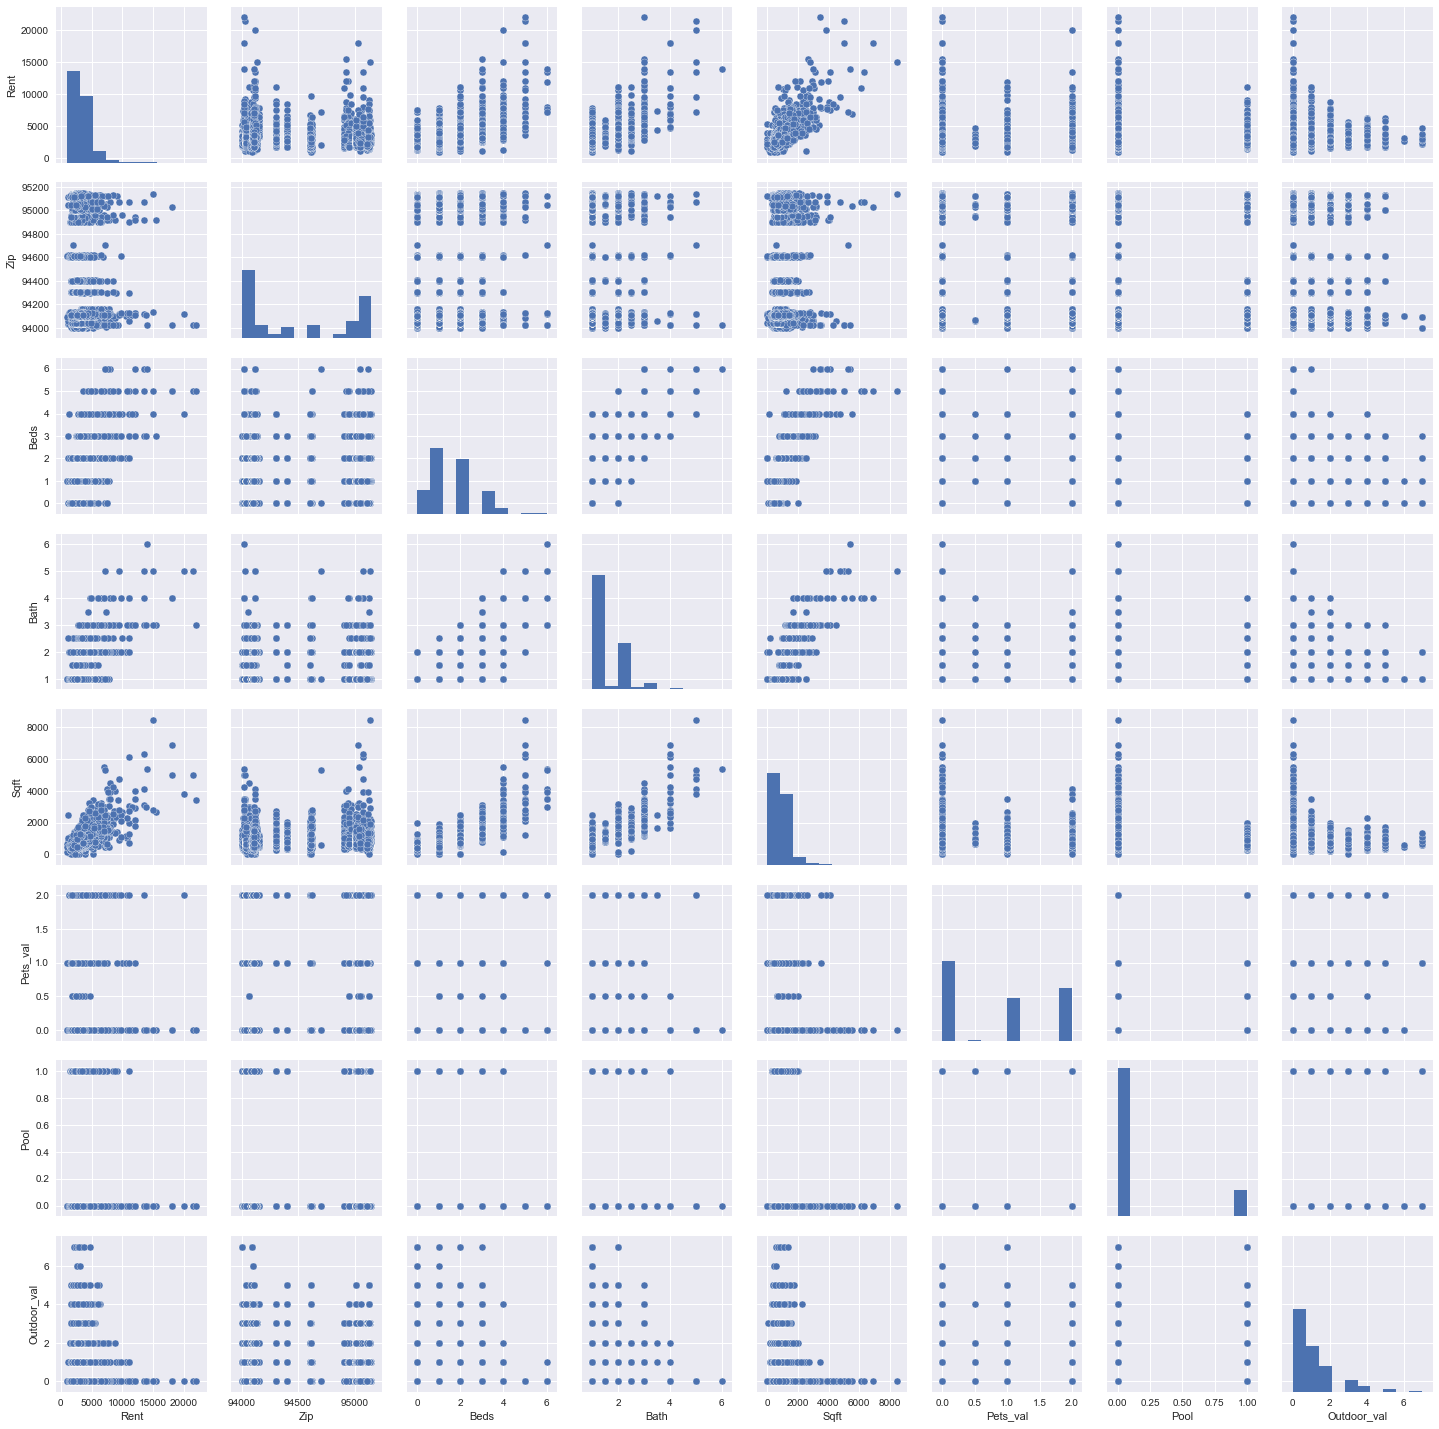

In [17]:
#sns.pairplot(smaller_df[['Rent', 'Zip', 'Beds', 'Bath', 'Sqft', 'Pets_val','Pool', 'Outdoor_val']])
#plt.show()

In [18]:
#smaller_df.to_pickle("allthedata")

In [233]:
geos = pd.DataFrame.from_csv('geod_nojson.csv', header=None)

In [234]:
geos.columns = ['Address', 'lat', 'long']

In [235]:
geos.shape

(3124, 3)

In [77]:
result = pd.merge(smaller_df, geos, left_index=True, right_index=True)

In [78]:
result.shape

(3124, 21)

In [79]:
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3124 entries, 0 to 5979
Data columns (total 21 columns):
Address_x        3124 non-null object
Bath             3124 non-null float64
Beds             3124 non-null int64
Features         2459 non-null object
Kitchen          2179 non-null object
LivingSpace      1599 non-null object
Outdoor          1673 non-null object
Parking          3124 non-null object
Pets             2353 non-null object
Rent             3124 non-null int64
Sqft             3124 non-null int64
Zip              3124 non-null int64
uFeatures        1346 non-null object
Pets_val         3124 non-null float64
Parking_val      3124 non-null int64
Amenities_val    3124 non-null int64
Outdoor_val      3124 non-null int64
Pool             3124 non-null int64
Address_y        3124 non-null object
lat              3065 non-null float64
long             3065 non-null float64
dtypes: float64(4), int64(8), object(9)
memory usage: 616.9+ KB


In [80]:
geos['geometry'] = geos.apply(lambda x: Point((float(x.long), float(x.lat))), axis=1)
geos_df = gpd.GeoDataFrame(geos, geometry='geometry')

In [81]:
geos_df.shape

(3124, 4)

In [82]:
sf_center = Point((float(-122.407437), float(37.787994)))

geos_df['dist_from_sf_center'] = [l.distance(sf_center) for l in geos_df.geometry]

In [117]:
geos_df[geos_df.lat.isnull()]

,Address,lat,long,geometry,dist_from_sf_center
index_left,,,,,
889,100 Old Quarry Rd Larkspur CA 94939,NaN,NaN,POINT (nan nan),1.797693e+308
890,100 Old Quarry Rd Larkspur CA 94939,NaN,NaN,POINT (nan nan),1.797693e+308
891,100 Old Quarry Rd Larkspur CA 94939,NaN,NaN,POINT (nan nan),1.797693e+308
892,100 Old Quarry Rd Larkspur CA 94939,NaN,NaN,POINT (nan nan),1.797693e+308
894,108 Prfssnl Ctr Pky San Rafael CA 94903,NaN,NaN,POINT (nan nan),1.797693e+308
895,108 Prfssnl Ctr Pky San Rafael CA 94903,NaN,NaN,POINT (nan nan),1.797693e+308
896,108 Prfssnl Ctr Pky San Rafael CA 94903,NaN,NaN,POINT (nan nan),1.797693e+308
1007,299 South St Sausalito CA 94965,NaN,NaN,POINT (nan nan),1.797693e+308
2766,227 Elm St San Mateo CA 94401,NaN,NaN,POINT (nan nan),1.797693e+308


In [118]:
sf = gpd.read_file('SF Find Neighborhoods/geo_export_ba54c133-9f1c-4d00-9fe0-827d0bef3148.shp')

In [119]:
sf.head()

,link,name,geometry
0,"http://en.wikipedia.org/wiki/Sea_Cliff,_San_Fr...",Seacliff,POLYGON ((-122.4934552679999 37.78351817100008...
1,,Lake Street,POLYGON ((-122.4871507149999 37.78378542700005...
2,http://www.nps.gov/prsf/index.htm,Presidio National Park,POLYGON ((-122.4775801709999 37.81099311300005...
3,,Presidio Terrace,POLYGON ((-122.4724105299999 37.78734653900005...
4,http://www.sfgate.com/neighborhoods/sf/innerri...,Inner Richmond,POLYGON ((-122.4726257899999 37.78631480600006...


In [120]:
del sf['link']

In [121]:
sf.head()

,name,geometry
0,Seacliff,POLYGON ((-122.4934552679999 37.78351817100008...
1,Lake Street,POLYGON ((-122.4871507149999 37.78378542700005...
2,Presidio National Park,POLYGON ((-122.4775801709999 37.81099311300005...
3,Presidio Terrace,POLYGON ((-122.4724105299999 37.78734653900005...
4,Inner Richmond,POLYGON ((-122.4726257899999 37.78631480600006...


In [122]:
sf.columns = ['neighborhood', 'geometry']

In [123]:
oak = gpd.read_file('CEDA_Nhhods02/CEDA_Neighborhoods2002.shp')
oak.columns = ['neighborhood', 'geometry']

In [124]:

all_hoods = sf.append(oak)

In [125]:
all_hoods.head()

,neighborhood,geometry
0,Seacliff,POLYGON ((-122.4934552679999 37.78351817100008...
1,Lake Street,POLYGON ((-122.4871507149999 37.78378542700005...
2,Presidio National Park,POLYGON ((-122.4775801709999 37.81099311300005...
3,Presidio Terrace,POLYGON ((-122.4724105299999 37.78734653900005...
4,Inner Richmond,POLYGON ((-122.4726257899999 37.78631480600006...


In [94]:
#marin = gpd.read_file('City/City.shp')
#marin.head()
#marin = marin[['Name', 'geometry']]
#marin.columns = ['neighborhood', 'geometry']

#marin.head()

,neighborhood,geometry
0,Larkspur,POLYGON ((-122.5243029121294 37.95572865743023...
1,Mill Valley,POLYGON ((-122.5600658839977 37.92963285094756...
2,Corte Madera,POLYGON ((-122.5040388375632 37.94204254609092...
3,Belvedere,POLYGON ((-122.4760641078376 37.88599926119488...
4,San Anselmo,(POLYGON ((-122.5835276637802 37.9993797449077...


In [95]:
#all_hoods = all_hoods.append(marin)

In [126]:
geos_df.crs = sf.crs
#df_joined = gpd.tools.sjoin(geos_df,all_hoods, how="left", op='within')
#df_joined.tail()

In [128]:
del df_joined

In [129]:
CA_all = gpd.read_file('Cities2015/Cities2015.shp')

In [130]:
CA_all.head()

,NAME,CityType,Pop2010,Land_sqmi,DateIncorp,WebLink,County,Notes,CityAbbv,geometry
0,Benicia,City,26997,12.93,1850-03-27,http://www.ci.benicia.ca.us,Solano,,Ben,POLYGON ((-122.1950206756592 38.06052589416504...
1,Vallejo,City,115942,30.67,1868-03-30,http://www.ci.vallejo.ca.us,Solano,,Val,(POLYGON ((-122.1957340240479 38.1534748077392...
2,Rio Vista,City,7360,6.69,1894-01-06,http://www.ci.rio-vista.ca.us,Solano,,RVs,"POLYGON ((-121.6857225265765 38.1586633935685,..."
3,Colusa,City,5971,1.83,1868-06-16,http://www.colusa-ca.gov,Colusa,06-15-007,Clu,"(POLYGON ((-122.02676701273 39.18156497656737,..."
4,Williams,City,5123,5.44,1920-05-17,http://www.cityofwilliams.org,Colusa,,Wms,POLYGON ((-122.1325376417235 39.16569829375753...


In [99]:
CA_all = the_rest[['NAME', 'geometry']]

In [131]:
the_rest = pd.DataFrame()

the_rest = the_rest.append(CA_all[CA_all.County == 'Contra Costa'])

In [132]:
the_rest.head()

,NAME,CityType,Pop2010,Land_sqmi,DateIncorp,WebLink,County,Notes,CityAbbv,geometry
298,San Ramon,City,72148,18.06,1983-07-01,http://www.ci.san-ramon.ca.us,Contra Costa,07-15-006,SRmn,(POLYGON ((-121.9218788146973 37.7504940032959...
301,Danville,Town,42039,18.03,1982-07-01,http://www.ci.danville.ca.us,Contra Costa,,Dnvl,POLYGON ((-122.0062238515494 37.84524258098038...
303,Moraga,Town,16016,9.43,1974-11-13,http://www.ci.moraga.ca.us,Contra Costa,,Mrga,"POLYGON ((-122.1337890625 37.87569618225098, -..."
307,Orinda,City,17643,12.68,1985-07-01,http://www.cityoforinda.org,Contra Costa,,Orin,POLYGON ((-122.1931419372559 37.92036247253418...
308,El Cerrito,City,23549,3.69,1917-08-23,http://www.el-cerrito.org,Contra Costa,,ECr,POLYGON ((-122.3178322162837 37.93832181110279...


In [133]:
the_rest = the_rest.append(CA_all[CA_all.County == 'Santa Clara'])

In [134]:
the_rest = the_rest.append(CA_all[CA_all.County == 'Marin'])

In [135]:
the_rest = the_rest.append(CA_all[CA_all.County == 'San Mateo'])

In [136]:
the_rest.head()

,NAME,CityType,Pop2010,Land_sqmi,DateIncorp,WebLink,County,Notes,CityAbbv,geometry
298,San Ramon,City,72148,18.06,1983-07-01,http://www.ci.san-ramon.ca.us,Contra Costa,07-15-006,SRmn,(POLYGON ((-121.9218788146973 37.7504940032959...
301,Danville,Town,42039,18.03,1982-07-01,http://www.ci.danville.ca.us,Contra Costa,,Dnvl,POLYGON ((-122.0062238515494 37.84524258098038...
303,Moraga,Town,16016,9.43,1974-11-13,http://www.ci.moraga.ca.us,Contra Costa,,Mrga,"POLYGON ((-122.1337890625 37.87569618225098, -..."
307,Orinda,City,17643,12.68,1985-07-01,http://www.cityoforinda.org,Contra Costa,,Orin,POLYGON ((-122.1931419372559 37.92036247253418...
308,El Cerrito,City,23549,3.69,1917-08-23,http://www.el-cerrito.org,Contra Costa,,ECr,POLYGON ((-122.3178322162837 37.93832181110279...


In [137]:
the_rest = the_rest[['NAME', 'geometry']]

In [138]:
the_rest = gpd.GeoDataFrame(the_rest, geometry='geometry')

In [139]:
the_rest.head()

,NAME,geometry
298,San Ramon,(POLYGON ((-121.9218788146973 37.7504940032959...
301,Danville,POLYGON ((-122.0062238515494 37.84524258098038...
303,Moraga,"POLYGON ((-122.1337890625 37.87569618225098, -..."
307,Orinda,POLYGON ((-122.1931419372559 37.92036247253418...
308,El Cerrito,POLYGON ((-122.3178322162837 37.93832181110279...


In [140]:
the_rest.columns = ['neighborhood', 'geometry']

In [141]:
all_hoods = all_hoods.append(the_rest)

In [312]:
df_joined = gpd.tools.sjoin(geos_df,all_hoods, how="left", op='within')
df_joined.tail()

,Address,lat,long,geometry,dist_from_sf_center,index_right,neighborhood
5945,520 Van Buren Ave Oakland CA 94610,37.811258,-122.250856,POINT (-122.2508564 37.8112581),0.158299,NaN,NaN
5946,520 Van Buren Ave Oakland CA 94610,37.811258,-122.250856,POINT (-122.2508564 37.8112581),0.158299,NaN,NaN
5977,1181-1183 Ocean Ave San Francisco CA 94112,37.723498,-122.454894,POINT (-122.4548939 37.7234975),0.080075,60.0,Ingleside
5978,1181-1183 Ocean Ave San Francisco CA 94112,37.723498,-122.454894,POINT (-122.4548939 37.7234975),0.080075,60.0,Ingleside
5979,1181-1183 Ocean Ave San Francisco CA 94112,37.723498,-122.454894,POINT (-122.4548939 37.7234975),0.080075,60.0,Ingleside


In [313]:
df_joined.shape

(3124, 7)

In [247]:
#for index, row in df_joined[df_joined.neighborhood.isnull()].iterrows():
    #print(row[0]) #split string and take only City name somehow.

In [314]:
df_joined.neighborhood.head()

0    South of Market
1    South of Market
2    South of Market
3    South of Market
4        Rincon Hill
Name: neighborhood, dtype: object

In [315]:
df_joined.shape

(3124, 7)

In [386]:
smaller_df.shape

(3124, 13)

In [238]:
#df_joined[df_joined.neighborhood.isnull()].neighborhood

In [317]:
neighborhood = []
for index, row in df_joined[df_joined.neighborhood.isnull()].iterrows():
    if "Suasalito" in row[0]:
        n = "Sausalito"
    elif "Mill Valley" in row[0]:
        n = "Mill Valley" 
    elif "Kentfield" in row[0]:
        n = "Kentfield"
    elif "Novato" in row[0]:
        n = "Novato"
    elif "Ross" in row[0]:
        n = "Ross"
    elif "Tiburon" in row[0]:
        n = "Tiburon"
    elif "San Rafael" in row[0]:
        n = "San Rafael"
    elif "Milpitas" in row[0]:
        n = "Milpitas"
    elif "San Francisco" in row[0]:
        n = "San Francisco"
    elif "Redwood City" in row[0]:
        n = "Redwood City"
    elif "Menlo Park" in row[0]:
        n = "Menlo Park"
    elif "Sunnyvale" in row[0]:
        n = "Sunnyvale"
    elif "San Jose" in row[0]:
        n = "San Jose"
    elif "Palo Alto" in row[0]:
        n = "Palo Alto"
    elif "Half Moon Bay" in row[0]:
        n = "Half Moon Bay"
    elif "Daly City" in row[0]:
        n = "Daly City"
    elif "Portola Valley" in row[0]:
        n = "Portola Valley"
    elif "Peidmont" in row[0]:
        n = "Peidmont"
    elif "Santa Clara" in row[0]:
        n = "Santa Clara"
    elif "Los Altos Hills" in row[0]:
        n = "Los Altos Hills"
    elif "Los Gatos" in row[0]:
        n = "Los Gatos"
    elif "Cambell" in row[0]:
        n = "Cambell"
    elif "Saratoga" in row[0]:
        n = "Saratoga"
    elif "Morgan Hill" in row[0]:
        n = "Morgan Hill"
    elif "Fairfax" in row[0]:
        n = "Fairfax"
    elif "Colma" in row[0]:
        n = "Colma"
    elif "Broadmoor" in row[0]:
        n = "Broadmoor"
    elif "Emerald Hills" in row[0]:
        n = "Emerald Hills"
    elif "Cupertino" in row[0]:
        n = "Cupertino"
    elif "Oakland" in row[0]:
        n = "Oakland"
    elif "Larkspur" in row[0]:
        n = "Larkspur"
    neighborhood.append(n)
len(neighborhood)

367

In [318]:
#df_joined = df_joined[df_joined.neighborhood.notnull()]

In [387]:
df_joined.shape

(3124, 7)

In [388]:
df_joined.head()

,Address,lat,long,geometry,dist_from_sf_center,index_right,neighborhood
0,1222 Harrison St San Francisco CA 94103,37.773611,-122.409248,POINT (-122.4092483 37.7736106),0.014497,30.0,South of Market
1,1222 Harrison St San Francisco CA 94103,37.773611,-122.409248,POINT (-122.4092483 37.7736106),0.014497,30.0,South of Market
2,1222 Harrison St San Francisco CA 94103,37.773611,-122.409248,POINT (-122.4092483 37.7736106),0.014497,30.0,South of Market
3,1222 Harrison St San Francisco CA 94103,37.773611,-122.409248,POINT (-122.4092483 37.7736106),0.014497,30.0,South of Market
4,340 Fremont St San Francisco CA 94105,37.787040,-122.392960,POINT (-122.39296 37.78704),0.014508,28.0,Rincon Hill


In [389]:
smaller_df['neighborhood'] = df_joined['neighborhood']

In [494]:
dummy.head()

,Address,Bath,Beds,Features,Kitchen,LivingSpace,Outdoor,Parking,Pets,Rent,...,Grill,Picnic Area,Waterfront,Deck,Fenced Lot,Garden,Lawn,Yard,Porch,Pool
0,1222 Harrison StSan FranciscoCA94103,1.0,0,"High Speed Internet Access,Wi-Fi,Washer/Dryer,...",Green Rooftops,"Hardwood Floors,Carpet,Vinyl Flooring,Dining R...","Rooftop Lounge,Courtyard,Grill,Picnic Area",1,1,3495,...,0,0,0,0,0,0,0,0,0,0
1,1222 Harrison StSan FranciscoCA94103,1.0,0,"High Speed Internet Access,Wi-Fi,Washer/Dryer,...",Green Rooftops,"Hardwood Floors,Carpet,Vinyl Flooring,Dining R...","Rooftop Lounge,Courtyard,Grill,Picnic Area",1,1,3495,...,0,0,0,0,0,0,0,0,0,0
2,1222 Harrison StSan FranciscoCA94103,1.0,1,"High Speed Internet Access,Wi-Fi,Washer/Dryer,...",Green Rooftops,"Hardwood Floors,Carpet,Vinyl Flooring,Dining R...","Rooftop Lounge,Courtyard,Grill,Picnic Area",1,1,4136,...,0,0,0,0,0,0,0,0,0,0
3,1222 Harrison StSan FranciscoCA94103,2.0,2,"High Speed Internet Access,Wi-Fi,Washer/Dryer,...",Green Rooftops,"Hardwood Floors,Carpet,Vinyl Flooring,Dining R...","Rooftop Lounge,Courtyard,Grill,Picnic Area",1,1,5342,...,0,0,0,0,0,0,0,0,0,0
4,340 Fremont StSan FranciscoCA94105,1.0,0,"Washer/Dryer,Air Conditioning,Storage Units",Island Kitchen with Stainless Steel Appliances,Walk-In Closets,Sundeck,1,1,3140,...,0,0,0,0,0,0,0,0,0,0


In [391]:
smaller_df = smaller_df[smaller_df.neighborhood.notnull()]

In [600]:
smaller_df.to_pickle('smallerdf')

In [502]:
dummy = pd.get_dummies(smaller_df, columns=["neighborhood"])

In [530]:
del dummy['Features']
del dummy['Kitchen']
del dummy['LivingSpace']
del dummy['Outdoor']
del dummy['uFeatures']
del dummy['Address']
del dummy['Pets']
del dummy['Zip']

In [556]:
dummy.to_pickle("final_dataset")

In [354]:
#Gradient boosting
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.cross_validation import train_test_split

/Users/bekcunning/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [545]:
#X = rentals.loc[:,['Bath', 'Beds', 'Sqft', 'Zip', 'Pets_val', 'Parking_val', 'Amenities_val', 'Outdoor_val', 'Pool']]
X = dummy.loc[:, dummy.columns != 'Rent']
y = dummy['Rent']

In [546]:
feature_columns = X.columns

In [547]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

In [555]:
gbmodel1 = GradientBoostingRegressor(n_estimators=5000, learning_rate=0.05, max_depth=6, subsample=.2)
gbmodel1.fit(X_train, y_train)
y_pred_gb1 = gbmodel1.predict(X_test)
np.sqrt(np.mean((y_pred_gb1 - y_test)**2))



0.75771888347497374

In [559]:
scores = list(zip(X_train.columns, gbmodel1.feature_importances_))

In [558]:
r2_score(y_test, y_pred_gb1)

0.75771888347497374

In [560]:
scores.sort()

In [566]:
sorted_scores = sorted(scores, key=lambda x: x[1], reverse=True)

In [567]:
sorted_scores

[('Sqft', 0.278863153594538),
 ('Bath', 0.049460376166128479),
 ('Beds', 0.045146401806982948),
 ('neighborhood_Lower Nob Hill', 0.035589595449906128),
 ('neighborhood_Mission', 0.034620657635168223),
 ('neighborhood_Lower Pacific Heights', 0.02816203948733359),
 ('neighborhood_Rincon Hill', 0.024869770110369591),
 ('neighborhood_Polk Gulch', 0.023295246839545546),
 ('neighborhood_Tiburon', 0.018666555051780935),
 ('neighborhood_Redwood City', 0.018042450302658133),
 ('Washer/Dryer', 0.015303455853453963),
 ('Air Conditioning', 0.013919242247887303),
 ('neighborhood_San Jose', 0.012658577926992829),
 ('High Speed Internet Access', 0.012527363548543455),
 ('neighborhood_Russian Hill', 0.012506500585000635),
 ('neighborhood_Millbrae', 0.01209525967538844),
 ('Smoke Free', 0.011955906908859193),
 ('neighborhood_Campbell', 0.011498933241479962),
 ('Pets Allowed', 0.011223943874937286),
 ('neighborhood_Buena Vista', 0.01065751267122431),
 ('Balcony', 0.0099182241474538198),
 ('Cable Ready',

In [575]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

In [582]:
gbmodel1 = GradientBoostingRegressor(n_estimators=5000, learning_rate=0.01, max_depth=7, subsample=.2)
gbmodel1.fit(X_train, y_train)
y_pred_gb1 = gbmodel1.predict(X_test)
np.sqrt(np.mean((y_pred_gb1 - y_test)**2))

854.44571372473058

In [583]:
r2_score(y_test, y_pred_gb1)

0.7683909213984832

In [584]:
scores = list(zip(X_train.columns, gbmodel1.feature_importances_))

In [585]:
sorted_scores = sorted(scores, key=lambda x: x[1], reverse=True)

In [609]:
gbmodel1 = GradientBoostingRegressor(alpha=0.9, learning_rate=0.05, max_depth=5, n_estimators=100)
gbmodel1.fit(X_train, y_train)
y_pred_gb1 = gbmodel1.predict(X_test)
np.sqrt(np.mean((y_pred_gb1 - y_test)**2))

991.03743767511662

In [610]:
r2_score(y_test, y_pred_gb1)

0.68842202570460753

In [597]:
scores = list(zip(X_train.columns, gbmodel1.feature_importances_))

In [598]:
sorted_scores = sorted(scores, key=lambda x: x[1], reverse=True)

In [599]:
sorted_scores

[('Sqft', 0.25501219748021481),
 ('neighborhood_Mission', 0.045848483149604796),
 ('Beds', 0.04169311409155723),
 ('neighborhood_Lower Pacific Heights', 0.037960897139357332),
 ('neighborhood_Lower Nob Hill', 0.037819676665918303),
 ('Bath', 0.034187109791956979),
 ('neighborhood_Polk Gulch', 0.032635053600490557),
 ('neighborhood_Rincon Hill', 0.024696530527677223),
 ('neighborhood_Tiburon', 0.022088648106376858),
 ('neighborhood_Redwood City', 0.019257206074076397),
 ('neighborhood_Campbell', 0.013238708504649312),
 ('Washer/Dryer', 0.013040850040441492),
 ('neighborhood_Mission Bay', 0.012890230027110757),
 ('neighborhood_Pacific Heights', 0.012823440241427063),
 ('Air Conditioning', 0.01236548532183001),
 ('neighborhood_Millbrae', 0.012034347139086852),
 ('neighborhood_Financial District', 0.011742348687025016),
 ('Smoke Free', 0.011373785859720592),
 ('High Speed Internet Access', 0.011322271769722034),
 ('neighborhood_San Jose', 0.011191607504857639),
 ('Pets Allowed', 0.01025108